In [27]:
import pandas as pd#importing all the required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [28]:
df=pd.read_csv('/content/heart_disease.csv')#loading the dataset

In [29]:
df.head()#first 5 rows of data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


# **Exploratory Data Analysis (EDA)**

In [30]:
df.info()#checking datatypes,null values,number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [31]:
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)#replacing na values with mean

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


<Axes: >

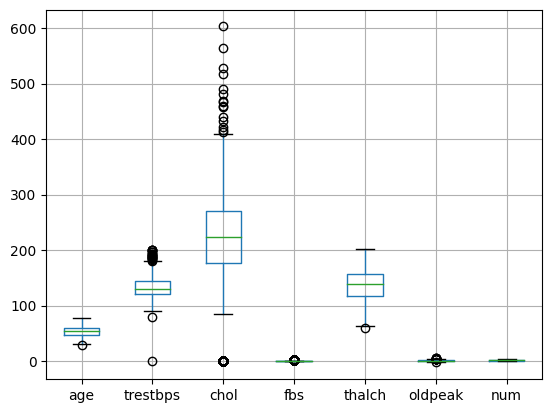

In [33]:
df.boxplot()#boxplot of data

In [34]:
# Function to cap upper outliers using IQR
def cap_upper_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x:max(min(x, upper_bound),lower_bound))
    df[(df['fbs'] < lower_bound) | (df['fbs'] > upper_bound)]
    return df

# List of numerical columns to cap outliers
columns_to_cap = ['age', 'trestbps', 'chol','thalch','oldpeak']

                                                                    # Add relevant numerical columns here

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)

<Axes: >

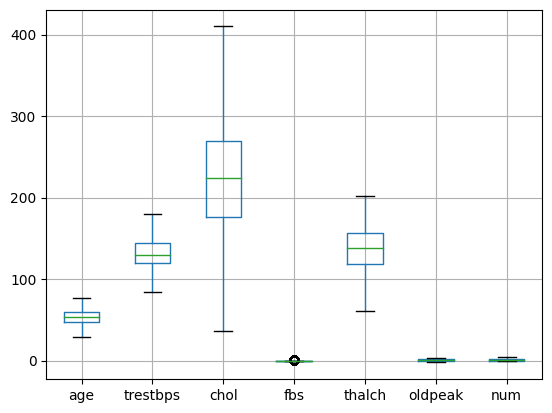

In [35]:
df.boxplot()#boxplot of data

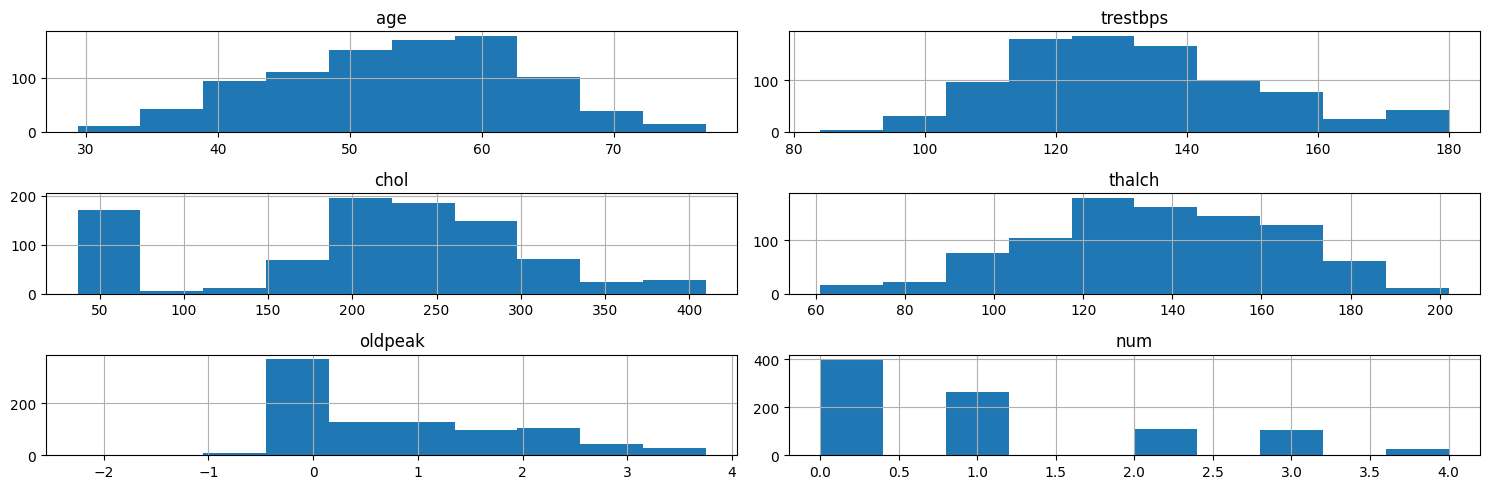

In [36]:
df.hist(figsize=(15,5))#histogram of data
plt.tight_layout()
plt.show()

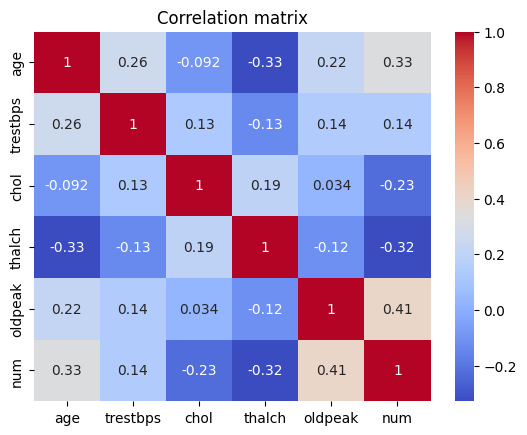

In [37]:
numeric_df=df.select_dtypes(include=[np.number])#correlation matrix of data
corr_matrix=numeric_df.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

In [38]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


# **Feature Engineering**

In [39]:
from sklearn.preprocessing import LabelEncoder
numeric_df=df.select_dtypes(include=[np.number])
# One-Hot Encoding for categorical variables with fewer than 5 unique values
categorical_columns = df.select_dtypes(include=['object']).nunique()
categorical_one_hot = categorical_columns[categorical_columns].index
df = pd.get_dummies(df, columns=categorical_one_hot.tolist(), drop_first=True)

# Label Encoding for categorical variables with more than 5 unique values
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# **Decision Tree Classification**

In [40]:
#splitting the data ino x and y
from sklearn.model_selection import train_test_split
x=df.drop('thal',axis=1)
y=df['thal']

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)#for testing purpose 20% data is taken.

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=2,random_state=0)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Check if y_test is binary and y_pred have the same shape
print(f"y_test unique values: {set(y_test)}")
print(f"y_pred unique values: {set(y_pred)}")

# If binary classification, get probabilities for ROC-AUC
if len(set(y_test)) == 2:  # Check if binary classification
    y_pred_proba = dt_model.predict_proba(X_test)[:, 1]
else:
    y_pred_proba = None  # Set to None if not binary classification

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Specify average method
recall = recall_score(y_test, y_pred, average='weighted')  # Specify average method
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify average method

# Calculate ROC-AUC only if binary classification
roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc}")


y_test unique values: {0, 1, 2}
y_pred unique values: {1, 2}
Accuracy: 0.47
Precision: 0.38
Recall: 0.47
F1-Score: 0.40
ROC-AUC: N/A


# **Hyperparameter Tuning**

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']  # Valid criteria for classification
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Accuracy as the scoring metric for classification
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_dt_classifier = grid_search.best_estimator_

# Output the best hyperparameters
print(f"Best Parameters: {best_params}")



Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 30}


# **Model Evaluation and Analysis**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.4725
Precision: 0.3841
Recall: 0.4725
F1-Score: 0.3958


[Text(0.5, 0.8333333333333334, 'x[6] <= 150.5\nentropy = 1.549\nsamples = 726\nvalue = [168, 286, 272]'),
 Text(0.25, 0.5, 'x[0] <= 68.5\nentropy = 1.555\nsamples = 505\nvalue = [133, 156, 216]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 1.547\nsamples = 474\nvalue = [126.0, 138.0, 210.0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.399\nsamples = 31\nvalue = [7, 18, 6]'),
 Text(0.75, 0.5, 'x[8] <= 0.5\nentropy = 1.373\nsamples = 221\nvalue = [35, 130, 56]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.198\nsamples = 156\nvalue = [23.0, 108.0, 25.0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 1.488\nsamples = 65\nvalue = [12, 22, 31]')]

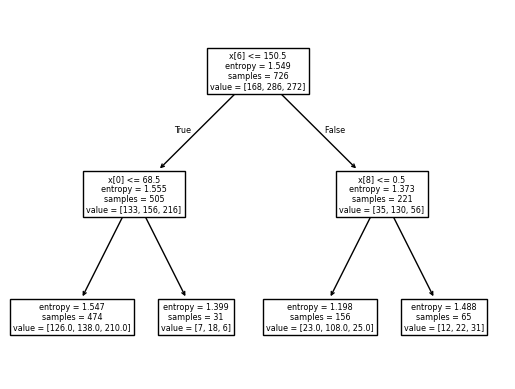

In [48]:
from sklearn import tree
tree.plot_tree(dt_model)


# **Interview Questions**

# Some common hyperparameters of decision tree models, and how do they affect the model's performance:


**max_depth**: Limits the depth of the tree. A smaller depth can prevent overfitting but may lead to underfitting.

**min_samples_split**: The minimum number of samples required to split an internal node. A higher value can reduce overfitting by requiring nodes to have more samples before splitting.


**max_features**: Limits the number of features to consider for the best split. Helps reduce overfitting.

# Difference between Label Encoding and One-Hot Encoding:

Label **Encoding**: Assigns an integer value to each category in a categorical column. It’s useful when the categories have an inherent order (ordinal data). However, it can introduce unintended ordinal relationships for nominal data, which may negatively affect some models.

**One-Hot Encoding**: Converts each category into a separate binary column. This prevents any ordinal relationship but can increase dimensionality, especially for variables with many categories. One-Hot Encoding is ideal for nominal data, where categories have no intrinsic order.